## 1 Data Wrangling

#  Contents<a id='Contents'></a>
* [1. Imports](#1._Imports)
* [2. Convert txt file to data frame](#2._Convert_txt_file_to_data_frame)
* [3. Clean empty values](#3._Clean)
* [4. Data Types Problem](#4._Data_Types)
* [5. Profiling](#5._Profiling)
* [6. Drop columns](#6._Drop_columns)
* [7. Explore the Data](#7._Explore_Data)
    * [7.1. Date Time Features](#7._Date_Time)
    * [7.2. Categorical Features](#7._Categorical)
    * [7.3. Numerical Features](#7._Numerical)
* [8. Save Data](#8._Save)


## 1. Imports <a id='1._Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
pd.options.mode.chained_assignment = None  # default='warn'
from pandas_profiling import ProfileReport


## 2. Convert txt file to data frame<a id='2._Convert_txt_file_to_data_frame'></a>

In [2]:
# https://stackoverflow.com/questions/47889565/reading-json-objects-from-text-file-into-pandas

list = []
with open('transactions.txt') as file:
    for line in file:
        list.append(json.loads(line)) #convert each line to json then add to list



In [3]:
transactions = pd.DataFrame(list) # convert this list into panda data frame

In [4]:
transactions

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.00,,,,False,,,False,False
1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.00,,,,True,,,False,False
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.00,,,,False,,,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.00,,,,False,,,False,False
4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.00,,,,True,,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000.0,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,...,,1095.04,,,,False,,,False,False
786359,732852505,732852505,50000.0,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,...,,1214.96,,,,False,,,False,False
786360,732852505,732852505,50000.0,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,...,,1233.85,,,,False,,,False,False
786361,732852505,732852505,50000.0,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,...,,1283.28,,,,False,,,False,False


## 3. Clean empty values<a id='3._Clean'></a>


In [5]:
transactions.shape

(786363, 29)

In [6]:
# too big cut to half use iloc for slicing on index
transactions = transactions.iloc[50000:,:]

In [7]:
# replace empty string with Nan
transactions_Nan = transactions.replace('', np.nan)

In [8]:
# drop all Nan column
transactions_dropped = transactions_Nan.dropna(how='all',axis= 1)

In [9]:
# check if successfuly dropped
#  6 columns have been dropped
transactions_dropped

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
50000,246251253,246251253,5000.0,624.04,2016-01-20T19:00:48,352.62,Domino's Pizza #347016,US,US,02,...,2014-10-02,2016-01-19,455,455,6002,PURCHASE,4375.96,True,False,False
50001,246251253,246251253,5000.0,271.42,2016-01-20T19:37:11,22.96,amazon.com,MEX,MEX,02,...,2014-10-02,2016-01-19,455,455,6002,PURCHASE,4728.58,False,False,False
50002,246251253,246251253,5000.0,1677.46,2016-01-20T19:45:23,102.76,discount.com,US,US,02,...,2014-10-02,2016-01-19,455,455,6002,PURCHASE,3322.54,False,False,False
50003,246251253,246251253,5000.0,1574.70,2016-01-20T19:52:39,41.50,Shake Shack #332129,US,US,05,...,2014-10-02,2016-01-19,455,455,6002,PURCHASE,3425.30,True,False,False
50004,246251253,246251253,5000.0,1533.20,2016-01-20T20:40:56,241.64,Dunkin' Donuts #237164,US,US,09,...,2014-10-02,2016-01-19,455,455,6002,PURCHASE,3466.80,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000.0,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1095.04,False,False,False
786359,732852505,732852505,50000.0,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,...,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1214.96,False,False,False
786360,732852505,732852505,50000.0,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1233.85,False,False,False
786361,732852505,732852505,50000.0,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,...,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1283.28,False,False,False


In [10]:
# check how many Nan values in each column
transactions_dropped.isnull().sum()

accountNumber                  0
customerId                     0
creditLimit                    0
availableMoney                 0
transactionDateTime            0
transactionAmount              0
merchantName                   0
acqCountry                  4298
merchantCountryCode          679
posEntryMode                3772
posConditionCode             379
merchantCategoryCode           0
currentExpDate                 0
accountOpenDate                0
dateOfLastAddressChange        0
cardCVV                        0
enteredCVV                     0
cardLast4Digits                0
transactionType              656
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
isFraud                        0
dtype: int64

In [11]:
# drop rows with any Nan
transactions_dropped = transactions_dropped.dropna(how = 'any', axis = 0)

In [12]:
# check no Nan values on any row
transactions_dropped.isnull().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64

## 4. Data Types Problem<a id='4._Data_Types'></a>



Let's see if all the data are in a usable form

In [13]:
transactions_dropped.dtypes

accountNumber                object
customerId                   object
creditLimit                 float64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                 object
posConditionCode             object
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
cardCVV                      object
enteredCVV                   object
cardLast4Digits              object
transactionType              object
currentBalance              float64
cardPresent                    bool
expirationDateKeyInMatch       bool
isFraud                        bool
dtype: object

### 4.1 Change Datetime

We can change date entries to date time objects. That is the column:
1. transactionDateTime
2. currentExpDate
3. accountOpenDate
4. dateOfLastAddressChange

In [14]:
columns_to_change = ['transactionDateTime','currentExpDate','accountOpenDate','dateOfLastAddressChange']
for column in columns_to_change:
#     transactions_dropped.loc[:,column] = pd.to_datetime(transactions_dropped[column])
    transactions_dropped.loc[:,column] = pd.to_datetime(transactions_dropped[column].copy())
    
    
# pd.to_datetime takes series as argument
# dont need to do loc on the assignment RHS
    

In [15]:
# Cannot do:

# 1. transactions_dropped.loc[:,column] = transactions_dropped.loc[:,column].apply(pd.to_datetime, errors = 'coerce')

# 2. for column in columns_to_change:
#     transactions_dropped[column] = pd.to_datetime(transactions_dropped[column])

#     transactions_dropped.loc[:,column] = pd.to_datetime(transactions_dropped.loc[:,column])

# the key is put pd.to_datetime at the front. and also do .loc

In [16]:
transactions_dropped.dtypes

accountNumber                       object
customerId                          object
creditLimit                        float64
availableMoney                     float64
transactionDateTime         datetime64[ns]
transactionAmount                  float64
merchantName                        object
acqCountry                          object
merchantCountryCode                 object
posEntryMode                        object
posConditionCode                    object
merchantCategoryCode                object
currentExpDate              datetime64[ns]
accountOpenDate             datetime64[ns]
dateOfLastAddressChange     datetime64[ns]
cardCVV                             object
enteredCVV                          object
cardLast4Digits                     object
transactionType                     object
currentBalance                     float64
cardPresent                           bool
expirationDateKeyInMatch              bool
isFraud                               bool
dtype: obje

## 5. Profiling<a id='5._Profiling'></a>

In [17]:
# profile = ProfileReport(transactions_dropped, title = 'Profile Report')

In [18]:
# profile

## 5 Profiling Summary

1. Total Fraud: 

    - Only 11513 out of 756363 of transactions are fraud, which means only 1.5% are fraudulent. This is very small.

2. Date type:

    - Everything looks normal: Transaction starts from January 2016 to December 30th


3. Categorical:

    - Account number
    - customerID: looks like its identical to account number
    - transaction type: Does fraud occur in transaction type other than purchase ? if not, we can get rid of it
    - merchantName: check for duplicates
    - cardLast4Digits: some only has 2 digits, does this mean fraud?


4. Numerical:

    - Balance:
    Need to deal with zeros and extreme values

    - Transaction amount: 
There seems to be a high correlation between transaction amount and fraudulence


## 6 Drop columns<a id='6._Drop_columns'></a>

From the above profiling it seems like there are no duplicate rows, but lets check for duplicate columns

### 6.1 Duplicate column

1. Check if customer Id is the same as account number

In [19]:
(transactions_dropped['customerId']==transactions_dropped['accountNumber']).value_counts()

True    727282
dtype: int64

The true entry count is the same as total number of rows, they are the same. so let's remove them

In [20]:
transactions_dropped = transactions_dropped.drop(columns='customerId')

2. Check if acqCountry is the same as merchant countrycode

In [21]:
(transactions_dropped['acqCountry']==transactions_dropped['merchantCountryCode']).value_counts()

True     727218
False        64
dtype: int64

not necessarily the same. so lets not remove them

3. Check if cardCVV is the same as enteredCVV

In [22]:
transactions_dropped[(transactions_dropped['cardCVV']!=transactions_dropped['enteredCVV'])].shape

(6487, 22)

there are 6676 unmatched CVV. We cannot drop them

4. It may be useful to create a column of 'CVV match'

In [23]:
transactions_dropped['CVVMatch'] = transactions_dropped['cardCVV'] == transactions_dropped['enteredCVV']


Drop enteredCVV and card CVV since we already have matched CVV

In [24]:
transactions_dropped = transactions_dropped.drop(columns=['enteredCVV','cardCVV'])

### 6.2 Useless column

reset index

In [25]:
transactions_dropped.reset_index(drop = True)

,accountNumber,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,CVVMatch
0,246251253,5000.0,624.04,2016-01-20 19:00:48,352.62,Domino's Pizza #347016,US,US,02,01,...,2029-02-01,2014-10-02,2016-01-19,6002,PURCHASE,4375.96,True,False,False,True
1,246251253,5000.0,271.42,2016-01-20 19:37:11,22.96,amazon.com,MEX,MEX,02,01,...,2021-07-01,2014-10-02,2016-01-19,6002,PURCHASE,4728.58,False,False,False,True
2,246251253,5000.0,1677.46,2016-01-20 19:45:23,102.76,discount.com,US,US,02,08,...,2023-03-01,2014-10-02,2016-01-19,6002,PURCHASE,3322.54,False,False,False,True
3,246251253,5000.0,1574.70,2016-01-20 19:52:39,41.50,Shake Shack #332129,US,US,05,01,...,2027-12-01,2014-10-02,2016-01-19,6002,PURCHASE,3425.30,True,False,False,True
4,246251253,5000.0,1533.20,2016-01-20 20:40:56,241.64,Dunkin' Donuts #237164,US,US,09,01,...,2022-09-01,2014-10-02,2016-01-19,6002,PURCHASE,3466.80,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727277,732852505,50000.0,48904.96,2016-12-22 18:44:12,119.92,Lyft,US,US,90,01,...,2022-12-01,2012-08-23,2012-08-23,3783,PURCHASE,1095.04,False,False,False,True
727278,732852505,50000.0,48785.04,2016-12-25 16:20:34,18.89,hulu.com,US,US,09,01,...,2023-08-01,2012-08-23,2012-08-23,3388,PURCHASE,1214.96,False,False,False,True
727279,732852505,50000.0,48766.15,2016-12-27 15:46:24,49.43,Lyft,US,US,02,01,...,2025-08-01,2012-08-23,2012-08-23,3783,PURCHASE,1233.85,False,False,False,True
727280,732852505,50000.0,48716.72,2016-12-29 00:30:55,49.89,walmart.com,US,US,09,99,...,2022-07-01,2012-08-23,2012-08-23,3388,PURCHASE,1283.28,False,False,False,True


In [26]:
transactions.dtypes

accountNumber                object
customerId                   object
creditLimit                 float64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                 object
posConditionCode             object
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
cardCVV                      object
enteredCVV                   object
cardLast4Digits              object
transactionType              object
echoBuffer                   object
currentBalance              float64
merchantCity                 object
merchantState                object
merchantZip                  object
cardPresent                    bool
posOnPremises                object
recurringAuthInd             object
expirationDateKeyInMatch    

## 7 Explore Data Entries<a id='7._Explore_Data'></a>

### 7.1 Datetime Features <a id='7._Date_Time'></a>



#### 7.1.1 Check if it has healthy distribution. no outliers

What do I need to change about date time ?

In [27]:
# fig, axs = plt.subplots(3,2,figsize = (15,15))
fraud_transactions = transactions_dropped[transactions_dropped.isFraud == True]
fraud_transactions
fraud_transactions= fraud_transactions.sort_values('transactionDateTime',ascending=True)
transactions= transactions_dropped.sort_values('transactionDateTime',ascending=True)



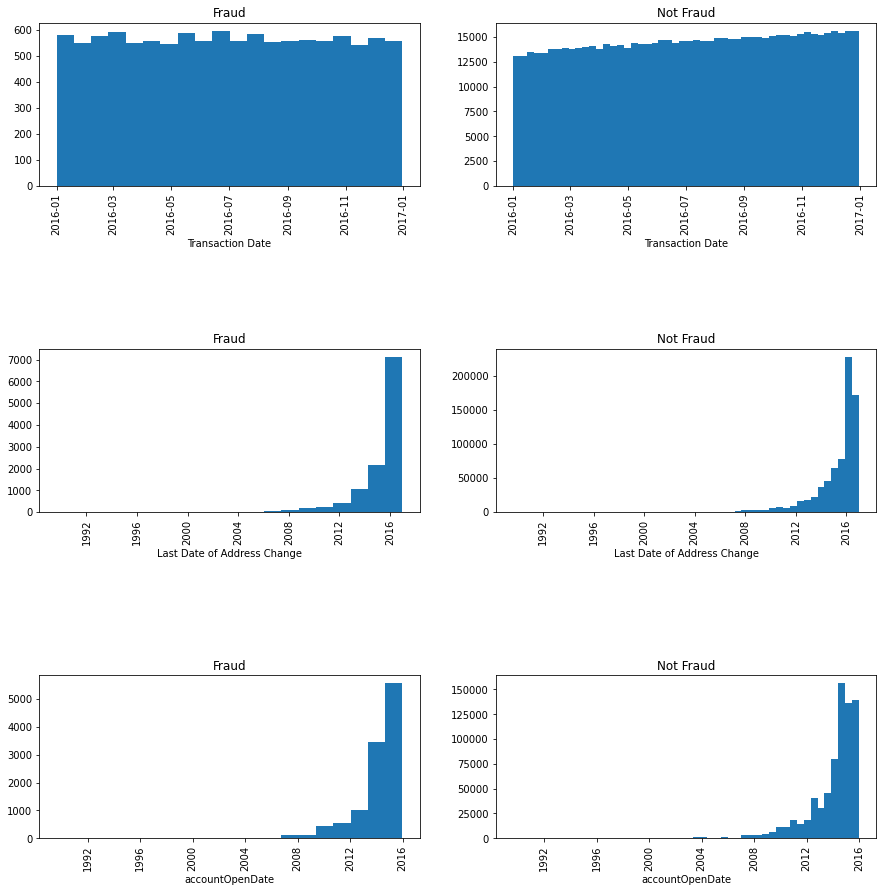

In [28]:
fig, axs = plt.subplots(3,2,figsize = (15,15))

# Fraud (1st column)
axs[0][0].hist(fraud_transactions['transactionDateTime'], bins = 20)
axs[0][0].set_xlabel('Transaction Date')
axs[0][0].set_title('Fraud')

axs[1][0].hist(fraud_transactions['dateOfLastAddressChange'], bins = 20)
axs[1][0].set_xlabel('Last Date of Address Change')
axs[1][0].set_title('Fraud')


axs[2][0].hist(fraud_transactions['accountOpenDate'], bins = 20)
axs[2][0].set_xlabel('accountOpenDate')
axs[2][0].set_title('Fraud')

# # Not Fraud (2nd Column)
axs[0][1].hist(transactions['transactionDateTime'], bins = 50)
axs[0][1].set_xlabel('Transaction Date')
axs[0][1].set_title('Not Fraud')

axs[1][1].hist(transactions['dateOfLastAddressChange'], bins = 50)
axs[1][1].set_xlabel('Last Date of Address Change')
axs[1][1].set_title('Not Fraud')

axs[2][1].hist(transactions['accountOpenDate'], bins = 50)
axs[2][1].set_xlabel('accountOpenDate')
axs[2][1].set_title('Not Fraud')

# Rotate x value 
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation =90)
    
plt.subplots_adjust(hspace = 1)

Looks like a healthy distribution no outliers. Transaction is between January 2016 to Dec 2016

### 7.2 Categorical Features <a id='7._Categorical'></a>



#### 7.2.1 Merchant Name

Check if there is any duplicate that are mistype

In [29]:
# check the top fraud merchant names
fraud_transactions.merchantName.value_counts().head(50)

Lyft                             690
ebay.com                         604
Fresh Flowers                    516
Uber                             422
cheapfast.com                    418
sears.com                        383
walmart.com                      373
oldnavy.com                      359
staples.com                      354
alibaba.com                      352
amazon.com                       347
gap.com                          338
apple.com                        329
target.com                       324
discount.com                     313
American Airlines                287
Blue Mountain Online Services    202
Fresh eCards                     199
Next Day Online Services         158
Blue Mountain eCards             114
Mobile eCards                    101
Fresh Online Services            100
Next Day eCards                   90
Delta Airlines                    87
Regal Cinemas #05791              83
EZ Putt Putt #69446               69
EZ Putt Putt #551896              69
E

Looks like there are many branches of the same company. Should we combine them together ?
Lets check how many EZ Putt Putt are there



In [30]:
fraud_transactions[fraud_transactions.merchantName.str.contains('EZ') == True].merchantName.value_counts()

EZ Putt Putt #69446     69
EZ Putt Putt #551896    69
EZ Putt Putt #40513     65
EZ Putt Putt #804489    60
EZ Putt Putt #755869    60
EZ Putt Putt #240241    56
EZ Putt Putt #503815    47
EZ Putt Putt #982199    43
Name: merchantName, dtype: int64

In [31]:
fraud_transactions[fraud_transactions.merchantName.str.contains('AMC') == True].merchantName.value_counts()

AMC #692956    35
AMC #128743    28
AMC #79863     26
AMC #74121     26
AMC #145832    25
AMC #606218    22
AMC #724446    19
AMC #191138    19
AMC #706324    17
AMC #552863    17
Name: merchantName, dtype: int64

In [32]:
fraud_transactions[fraud_transactions.merchantName.str.contains('Hardee') == True].merchantName.value_counts()

Hardee's #584914    3
Hardee's #589037    2
Hardee's #259223    2
Hardee's #229101    2
Hardee's #601816    2
Hardee's #941387    2
Hardee's #254356    2
Hardee's #918765    2
Hardee's #49071     1
Hardee's #852712    1
Hardee's #854553    1
Hardee's #978815    1
Hardee's #245522    1
Hardee's #998351    1
Hardee's #97825     1
Hardee's #129117    1
Hardee's #431398    1
Hardee's #385283    1
Hardee's #941439    1
Hardee's #745531    1
Hardee's #187642    1
Hardee's #283538    1
Hardee's #519881    1
Hardee's #186774    1
Hardee's #940832    1
Hardee's #533765    1
Hardee's #509359    1
Hardee's #696425    1
Hardee's #377180    1
Hardee's #862001    1
Hardee's #102912    1
Hardee's #510141    1
Hardee's #415826    1
Hardee's #814735    1
Name: merchantName, dtype: int64

Lets get rid of this column and possibly put all franchise under one name

In [33]:
separator = '#'
transactions['merchantName'] = [merchant_name.split(separator,1)[0].rstrip() for merchant_name in transactions['merchantName']]
# for each merchant name in transaction, split them in two using separator '#'. take the first element of the split
# strip the last empty space

transactions['merchantName'].str.contains('#').value_counts()

False    727282
Name: merchantName, dtype: int64

In [34]:
# Do the same with fraud transactions
fraud_transactions = transactions[transactions.isFraud ==True]
fraud_transactions['merchantName'].value_counts().head(20)

Lyft                 690
ebay.com             604
Fresh Flowers        516
EZ Putt Putt         469
Uber                 422
cheapfast.com        418
sears.com            383
walmart.com          373
oldnavy.com          359
staples.com          354
alibaba.com          352
amazon.com           347
gap.com              338
apple.com            329
target.com           324
discount.com         313
American Airlines    287
In-N-Out             236
AMC                  234
Regal Cinemas        212
Name: merchantName, dtype: int64

There are alot of '.com' lets check how many .com are fraud

In [35]:
fraud_transactions['merchantName'].str.contains('.com').value_counts()

False    6766
True     4545
Name: merchantName, dtype: int64

There are more than half of fraud have .com in it. We could use this to make a new column

In [36]:
fraud_transactions.loc[:,'containsCom'] = fraud_transactions['merchantName'].str.contains('.com').copy()
transactions.loc[:,'containsCom'] = transactions.loc[:,'merchantName'].str.contains('.com').copy()



#### 7.2.2 Transaction Type



In [37]:
# Does fraud occur in transaction type other than purchase?
fraud_transactions['transactionType'].value_counts()


PURCHASE                10900
REVERSAL                  304
ADDRESS_VERIFICATION      107
Name: transactionType, dtype: int64

Not all fraud transaction are Purchase so we need to keep this

#### 7.2.3 Card last 4 digits.

What do we do with only 2 digits or anything not 4?

In [38]:
transactions[transactions['cardLast4Digits'].str.len() < 4].shape


(100142, 22)

There are many rows with string card last 4 digits less than
4. Lets keep this, the number of digits might give us some insights. It might be more useful to make a new variable that tells us the length of the digits than the actual number

In [39]:
transactions['lengthOfLast4Digits'] = transactions['cardLast4Digits'].str.len()
transactions['lengthOfLast4Digits'].value_counts()

4    627140
3     93647
2      5781
1       714
Name: lengthOfLast4Digits, dtype: int64

In [40]:
# remove card last 4 digits column
transactions = transactions.drop(columns = 'cardLast4Digits')

#### 7.2.4 Pos Entry Mode


09 PAN entry via electronic commerce, including chip.

02 Magnetic stripe read. For Plus transactions, this code also means    that the exact Track 2 content is included and CVV checking is        possible.

05 Integrated circuit card read; card data reliable.

90 Magnetic stripe read and extract content of Track 1 or Track 2 included (CVV check is possible).

80 Chip card was unable to process/magnetic stripe read default.

In [41]:
transactions['posEntryMode'].value_counts()

05    292845
09    219748
02    182344
90     18210
80     14135
Name: posEntryMode, dtype: int64

Everything make sense. No faulty entry

#### 7.2.5 Post Condition Code


01 - Cardholder not present

08 - Mail/telephone order (includes Visa phone and reoccurring transactions)

99 - Doesnt exist

In [42]:
transactions['posConditionCode'].value_counts()
# make new feature for 99

01    581772
08    138543
99      6967
Name: posConditionCode, dtype: int64

code 99 doesnt exist. Should we replace with other code? Lets check what are the transaction with code 99. 

In [43]:
transactions[transactions['posConditionCode'] == '99'].merchantName.value_counts().head(30)

AMC                      345
EZ Putt Putt             288
Uber                     243
Lyft                     215
target.com               156
cheapfast.com            155
discount.com             153
walmart.com              152
sears.com                148
alibaba.com              141
staples.com              140
gap.com                  138
apple.com                137
oldnavy.com              137
ebay.com                 131
amazon.com               130
Sunoco Gas               119
Rodeway Inn              115
Regal Cinemas            105
Universe Massage          91
Subway                    88
Fresh eCards              85
Fresh Flowers             84
Apple iTunes              84
Play Store                82
Domino's Pizza            80
Franks Pub                78
Hilton Hotels             78
Blue Mountain eCards      77
Fresh Online Services     77
Name: merchantName, dtype: int64

#### 7.2.6 Country


check if merchant country code is the same as acqCOuntry entry



In [44]:
(transactions.acqCountry == transactions.merchantCountryCode).value_counts()

True     727218
False        64
dtype: int64

64 have countries that don't match. How many of these are fraud ?

In [45]:
transactions[(transactions.acqCountry != transactions.merchantCountryCode)].isFraud.value_counts()

False    64
Name: isFraud, dtype: int64

All of them are not fraud. What about the ones that have match countries:

In [46]:
transactions[transactions.acqCountry == transactions.merchantCountryCode].isFraud.value_counts()

False    715907
True      11311
Name: isFraud, dtype: int64

Whent the country is the same, there is more chance that is Fraud

### 7.3 Numerical Features <a id='7._Numerical'></a>



#### 7.3.1 Check for Zeros Transaction amount

In [47]:
fraud_transactions[fraud_transactions['transactionAmount']==0].transactionType.value_counts()

ADDRESS_VERIFICATION    107
REVERSAL                  5
Name: transactionType, dtype: int64

Most of the transaction types are address verification when transactiont amount is zero

#### 7.3.2 Check for distribution in credit card limit at 50000

How many transactions using credit card with limit of 50,000 are fraud? 

In [48]:
(transactions[transactions['creditLimit']==50000]['isFraud']).value_counts()

False    44973
True       789
Name: isFraud, dtype: int64

In [49]:
#  get the percentage
789/ (44973+789) * 100

1.7241379310344827

Only 1.72% of credit card with limit of 50,000 is fraud

What about the credit cards that are not 50,000. what are the percentages that are fraud?

In [50]:
(transactions[transactions['creditLimit']!=50000]['isFraud']).value_counts()

False    670998
True      10522
Name: isFraud, dtype: int64

In [51]:
#  get the percentage
10522/ (670998+10522) * 100

1.543901866416246

1.54% of credit card with limit of not 50,000 is fraud

They are about the same. so eventhough the cc limit is high, it only increase its fraud possibility by 0.2%
Should we keep this cc limit of 50,000?


Check the fraud/not fraud for each cc limit

Text(0.5, 0, 'cc limit $')

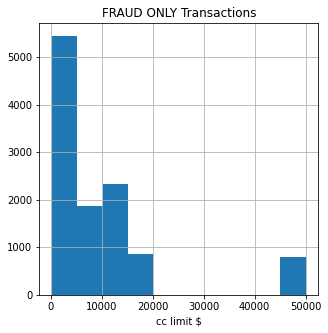

In [52]:
limitArray = fraud_transactions['creditLimit'].unique().sort()

fraud_transactions['creditLimit'].hist(figsize=(5,5))
plt.title('FRAUD ONLY Transactions')
plt.xlabel('cc limit $')

Text(0.5, 0, 'cc limit $')

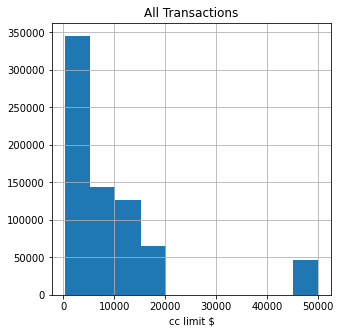

In [53]:
transactions['creditLimit'].hist(figsize=(5,5))
plt.title('All Transactions')
plt.xlabel('cc limit $')


We can do Z proportion test to check if the proportion is actually different ?
Lets reduce the number of unique values to 8 instead of 10. We can treat this entry as categorical instead

In [54]:
transactions['creditLimit'].value_counts()

5000.0     186794
15000.0    126544
7500.0      90514
2500.0      69619
20000.0     65676
10000.0     53449
50000.0     45762
1000.0      33489
250.0       30410
500.0       25025
Name: creditLimit, dtype: int64

In [55]:
conditions = [
    (transactions['creditLimit'] <= 1000.0),
    (transactions['creditLimit'] >= 2500.0) & (transactions['creditLimit'] <= 5000.0),
    (transactions['creditLimit'] >= 7500.0) & (transactions['creditLimit'] <= 10000.0),
    (transactions['creditLimit'] >= 15000.0)& (transactions['creditLimit'] <= 20000.0) ,
    (transactions['creditLimit'] == 50000.0)]
# 1- '1000 and below'
# 2- '2500-5000'
# 3- '7500-10000'
# 4- 15000-20000'
# 5-'50000 and over'
choices = [1, 2,3,4,5]
transactions['creditLimitCategory'] = np.select(conditions,choices)



<AxesSubplot:>

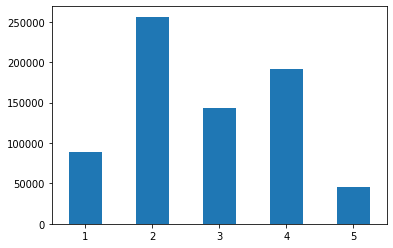

In [56]:
# Use pandas. plot to plot bar
# .sort_index make sure its not sorted according to the value

transactions['creditLimitCategory'].value_counts().sort_index(axis=0).plot(kind='bar', rot = 0, x = 'category')


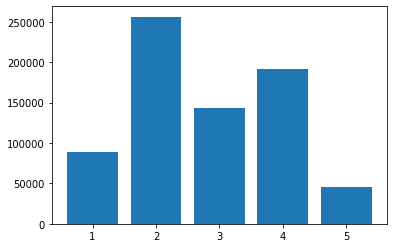

In [57]:
# alternative, use matplot lib plt.bar()
labels, counts = np.unique(transactions['creditLimitCategory'],return_counts = True)
plt.bar(labels, counts, align= 'center')
plt.gca().set_xticks(labels)
plt.show()

Drop creditLimit column now that we have turn it into categorical feature

In [62]:
transactions = transactions.drop(columns = 'creditLimit')

## 8 Save Data<a id='8._Save'></a>

In [63]:
transactions.dtypes

accountNumber                       object
availableMoney                     float64
transactionDateTime         datetime64[ns]
transactionAmount                  float64
merchantName                        object
acqCountry                          object
merchantCountryCode                 object
posEntryMode                        object
posConditionCode                    object
merchantCategoryCode                object
currentExpDate              datetime64[ns]
accountOpenDate             datetime64[ns]
dateOfLastAddressChange     datetime64[ns]
transactionType                     object
currentBalance                     float64
cardPresent                           bool
expirationDateKeyInMatch              bool
isFraud                               bool
CVVMatch                              bool
containsCom                           bool
lengthOfLast4Digits                  int64
creditLimitCategory                  int64
dtype: object

In [64]:
datapath = '../CreditCardFraud/data'
# renaming the output data directory and re-running this notebook, for example,
# will recreate this (empty) directory 'data' and resave the data files.
# NB this is not a substitute for a modern data pipeline, for which there are
# various tools. However, for our purposes here, and often in a "one off" analysis,
# this is useful because we have to deliberately move/delete our data in order
# to overwrite it.
#if path doesnt exist

if not os.path.exists(datapath):
    #create data path
    os.mkdir(datapath)
    
    

In [65]:
datapath_transactiondata = os.path.join(datapath, 'transaction_data_cleaned.csv')

# if path with this ski_data cleaned file doesnt exist
# if not os.path.exists(datapath_transactiondata):
# create it
transactions.to_csv(datapath_transactiondata, index=False)
print(datapath_transactiondata)

../CreditCardFraud/data/transaction_data_cleaned.csv


In [66]:
df = pd.read_csv('data/transaction_data_cleaned.csv')


In [67]:
df

,accountNumber,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,...,dateOfLastAddressChange,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,CVVMatch,containsCom,lengthOfLast4Digits,creditLimitCategory
0,419104777,50000.00,2016-01-01 00:01:02,44.09,Washington Post,US,US,9,1,subscriptions,...,2015-05-30 00:00:00,PURCHASE,0.00,False,False,False,True,False,4,5
1,958438658,20000.00,2016-01-01 00:01:47,164.57,cheapfast.com,US,US,5,1,online_retail,...,2013-07-20 00:00:00,PURCHASE,0.00,False,False,False,True,True,4,4
2,851126461,10000.00,2016-01-01 00:02:04,122.83,discount.com,US,US,2,8,online_retail,...,2014-10-18 00:00:00,PURCHASE,0.00,False,False,False,True,True,4,3
3,148963316,2500.00,2016-01-01 00:02:19,0.00,Fast Repair,US,US,5,1,auto,...,2013-12-12 00:00:00,ADDRESS_VERIFICATION,0.00,False,False,False,True,False,4,2
4,974901832,250.00,2016-01-01 00:03:47,24.56,staples.com,US,US,5,1,online_retail,...,2012-05-29 00:00:00,PURCHASE,0.00,False,False,False,True,True,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727277,690351684,6007.68,2016-12-30 23:57:33,128.84,EZ Putt Putt,US,US,9,1,entertainment,...,2015-02-26 00:00:00,PURCHASE,1492.32,True,False,False,True,False,4,3
727278,365766122,970.87,2016-12-30 23:58:25,49.47,alibaba.com,US,US,90,1,online_retail,...,2016-10-06 00:00:00,PURCHASE,6529.13,False,False,False,True,True,4,3
727279,543902721,767.70,2016-12-30 23:59:33,13.02,abc.com,US,US,5,8,online_subscriptions,...,2012-02-11 00:00:00,PURCHASE,232.30,False,False,False,True,True,4,1
727280,912493707,4991.10,2016-12-30 23:59:35,8.85,Play Store,US,US,9,8,mobileapps,...,2016-10-31 00:00:00,PURCHASE,8.90,False,False,False,True,False,4,2


In [68]:
df.dtypes

accountNumber                 int64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                  int64
posConditionCode              int64
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
transactionType              object
currentBalance              float64
cardPresent                    bool
expirationDateKeyInMatch       bool
isFraud                        bool
CVVMatch                       bool
containsCom                    bool
lengthOfLast4Digits           int64
creditLimitCategory           int64
dtype: object